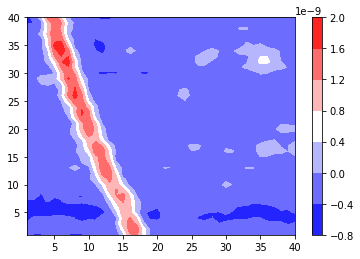

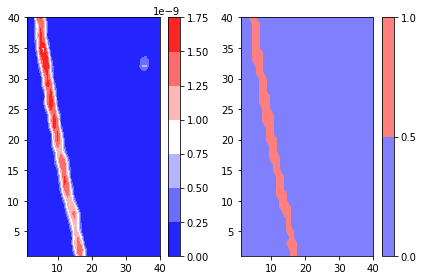

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

wire_image = np.loadtxt('../Data/100-0_72_NW-003')
#side = np.linspace(1,len(wire_image),len(wire_image))                                                                                                                                                     
side = np.linspace(1,40,40)
x,y = np.meshgrid(side,side)
plt.figure(1)
plt.contourf(x,y,wire_image[321:361,321:361],cmap='bwr')
plt.colorbar()
plt.show()



In [3]:
# manually sharpen the image
for x in range(len(wire_image)):
    for y in range(len(wire_image)):
        gaussian = (1/(2*math.pi))*math.exp(-(x**2 + y**2)/2.)
        # need to go back and check convolution code in matlab

In [ ]:
single_wire = wire_image[321:361,321:361]

for j in range(0,len(side)):
        for jj in range(0,len(side)):
                if single_wire[j,jj] < 0:
                        single_wire[j,jj] = 0
                else:
                        pass

count = np.zeros((len(side),len(side)))
top = np.max(single_wire)
bottom = np.min(single_wire)

for j in range(0,len(side)):
        for jj in range(0,len(side)):
                dist_from_top = top - single_wire[j,jj]
                dist_from_bottom = single_wire[j,jj] - bottom
                if dist_from_top < dist_from_bottom:
                        count[j,jj] = 1
                else:
                        count[j,jj] = 0

plt.figure(2)
plt.subplot(1,2,1)
plt.contourf(x,y,single_wire,cmap='bwr')
plt.colorbar()
plt.subplot(1,2,2)
plt.contourf(x,y,count,cmap='bwr',levels=[0,0.5,1])
plt.colorbar()
plt.tight_layout()
plt.show()

In [4]:
count

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
# now I want to get the points where we go from 0 --> 1 and 1 --> 0
# and then turn them into lines
# and then compute the "width" of the wires from those lines